<a href="https://colab.research.google.com/github/jakewalter/intro_seismology/blob/main/fourier_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Fourier series

Let's familiarize ourselves with some basics on Fourier series and time series. We generate a cosine function and add some shift in the time domain.

Follow through the end of the code. A shift in time corresponds to a phase rotation in the frequency domain.



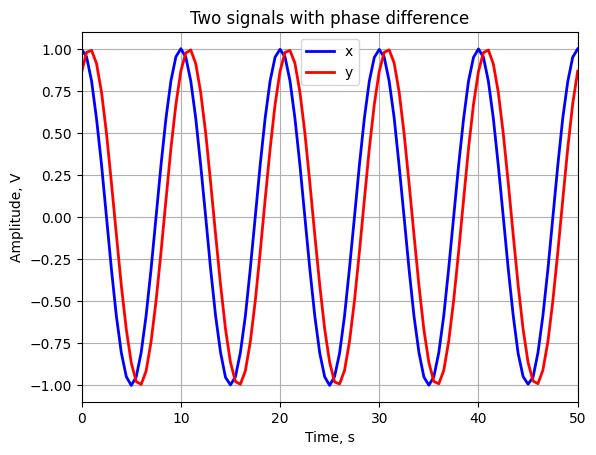

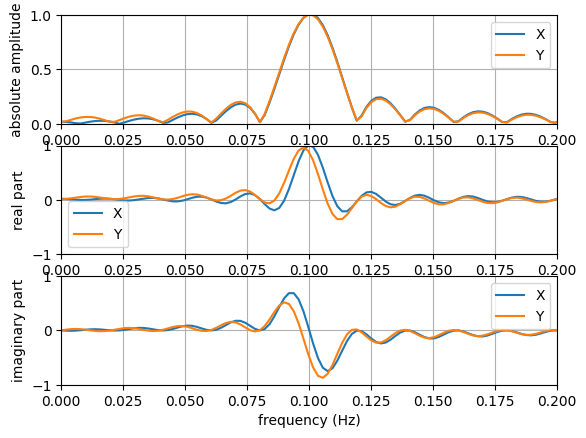

X-phase=0.061145280285760946
Y-phase=-0.45521688716105785
Y-X = -0.5163621674468188
input phase diff=-0.5235987755982988


In [53]:

import matplotlib.pyplot as plt
import numpy as np
dt = 0.5         # sample interval: 0.5s (how often you take a sample)
fs = 1/dt        # sampling rate: 1/0.5 = 2 Hz
fmax = fs/2      # Nyquist frequency
t = np.arange(0, 50 + dt, dt)   # time from 0 to 50 s
f0 = 0.1         # dominant frequency of 0.1 Hz

added_signal = np.pi/6

# generate signals
N = len(t)
x = np.cos(2 * np.pi * t * f0) + 0.002 * np.random.randn(N)   # generate time series (x)
y = np.cos(2 * np.pi * t * f0 - added_signal) + 0.002 * np.random.randn(N)   # time series (y) is shifted

# plot the signals
plt.figure(1)
plt.plot(t, x, 'b', linewidth=2)
plt.grid(True)
#plt.hold(True)
plt.plot(t, y, 'r', linewidth=2)
plt.xlim([0, 50])
plt.ylim([-1.1, 1.1])
plt.xlabel('Time, s')
plt.ylabel('Amplitude, V')
plt.title('Two signals with phase difference')
plt.legend(['x', 'y'])
plt.show()

# now will analyze the phase shift between these two time series
N = len(t)
L = N / 2         # L is a scaling factor to get the true amplitude
Nfft = 1024
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)   # frequency spacing of 0.002 Hz

# compute Fourier transform
Xf = np.fft.fft(x, Nfft) / L    # this uses higher frequency spacing, Nfft = 1024
X = Xf[:Nf + 1]
Xamp = np.abs(X)

Yf = np.fft.fft(y, Nfft) / L    # this uses higher frequency spacing, Nfft = 1024
Y = Yf[:Nf + 1]
Yamp = np.abs(Y)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(f, Xamp, f, Yamp)
plt.legend(['X', 'Y'])
plt.xlabel('frequency (Hz)')
plt.ylabel('absolute amplitude')
plt.ylim([0, 1])
plt.xlim([0, 0.2])
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(f, np.real(X), f, np.real(Y))
plt.legend(['X', 'Y'])
plt.xlabel('frequency (Hz)')
plt.ylabel('real part')
plt.ylim([-1, 1])
plt.xlim([0, 0.2])
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f, np.imag(X), f, np.imag(Y))
plt.legend(['X', 'Y'])
plt.xlabel('frequency (Hz)')
plt.ylabel('imaginary part')
plt.ylim([-1, 1])
plt.xlim([0, 0.2])
plt.grid(True)

plt.show()

# now let us find the phase shift
# find the dominant frequency, i.e., frequency with maximum amplitude
# then find the angle for X and Y at this frequency
indx = np.argmax(Xamp)
indy = np.argmax(Yamp)
phaseX = np.arctan2(np.imag(X[indx]), np.real(X[indx]))
phaseY = np.arctan2(np.imag(Y[indy]), np.real(Y[indy]))
phasediff = phaseY - phaseX

text1 = 'X-phase=' + str(phaseX)
text2 = 'Y-phase=' + str(phaseY)
text3 = 'Y-X = ' + str(phasediff)
text4 = 'input phase diff=' + str(-added_signal)
msg = '\n'.join([text1, text2, text3, text4])
print(msg)



Now, before you move on, change the variable "added_signal" to something else

##2. Compute the Fourier transform
Understand that peak corresponds to the fundamental frequency

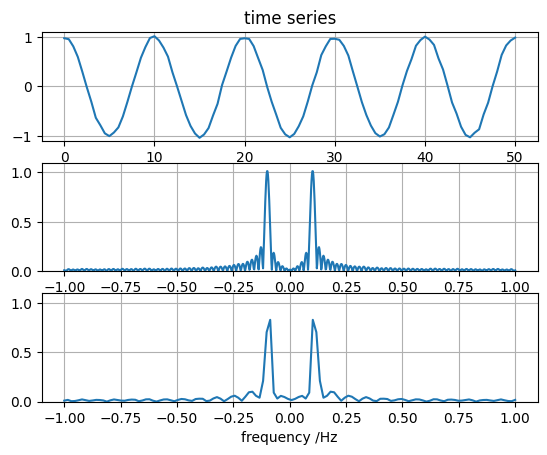

In [54]:

import numpy as np
import matplotlib.pyplot as plt

# signal parameters
dt = 0.5         # sample interval: 0.5s (how often you take a sample)
fs = 1/dt        # sampling rate: 1/0.5 = 2 Hz
fmax = fs/2      # this is the Nyquist frequency
t = np.arange(0, 50 + dt, dt)   # time from 0 to 50 s
f0 = 0.1         # dominant frequency of 0.1 Hz

# generate signals
N = len(t)
L = N / 2         # L is a scaling factor to get the true amplitude
x = np.cos(2 * np.pi * t * f0) + 0.02 * np.random.randn(N)   # generate time series (x)

# now compute Fourier transform
Nfft = 1024
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)    # frequency spacing of 0.002 Hz
f2 = fmax * np.linspace(-1, 1, Nfft)
X = np.abs(np.fft.fft(x, Nfft)) / L     # this uses higher frequency spacing, Nfft = 1024
Xx = X[:Nf + 1]

ftemp2 = fmax * np.linspace(-1, 1, 128)    # frequency spacing of 0.0157 Hz
Xtemp = np.abs(np.fft.fft(x, 128)) / L     # this uses sparser frequency spacing, Nfft = 64

# demo the symmetry of fft
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.ylim([-1.1, 1.1])
plt.xlabel('time /second')
plt.title('time series')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(f2, np.fft.fftshift(X))
plt.xlabel('frequency /Hz')
plt.grid(True)
plt.ylim([0, 1.1])
#plt.title('Nfft = 1024, df = 0.002 Hz, +/- frequency')

plt.subplot(3, 1, 3)
plt.plot(ftemp2, np.fft.fftshift(Xtemp))
plt.ylim([0, 1.1])
plt.xlabel('frequency /Hz')
plt.grid(True)
#plt.title('Nfft = 1024, df = 0.0157 Hz, +/- frequency')


In practice, we only plot one side of the Fourier transform

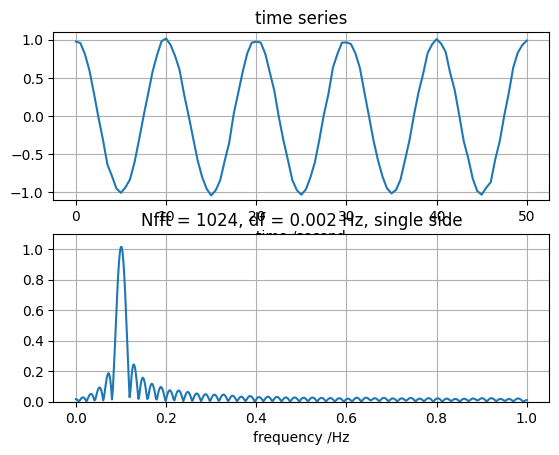

In [55]:

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.ylim([-1.1, 1.1])
plt.xlabel('time /second')
plt.grid(True)
plt.title('time series')

plt.subplot(2, 1, 2)
plt.plot(f, Xx)
plt.ylim([0, 1.1])
plt.xlabel('frequency /Hz')
plt.grid(True)
plt.title('Nfft = 1024, df = 0.002 Hz, single side')

plt.show()

##3. Additional frequencies in the signal

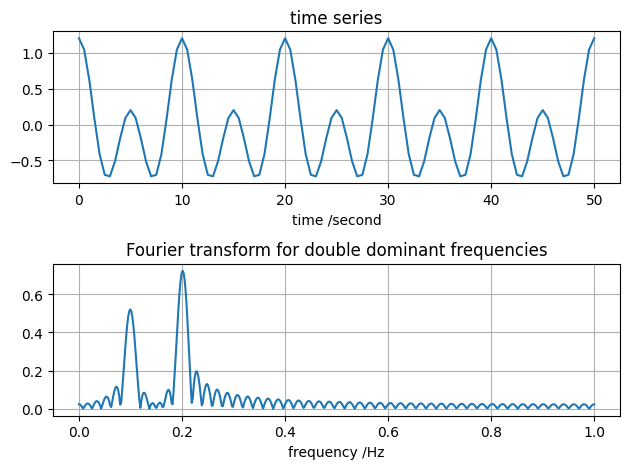

In [61]:

# signal parameters
dt = 0.5        # sample interval: 0.5s (how often you take a sample)
fs = 1 / dt     # sampling rate: 1/0.5 = 2 Hz
fmax = fs / 2   # this is the Nyquist frequency
t = np.arange(0, 50 + dt, dt)  # time from 0 to 50 s
f01 = 0.1       # dominate frequency of 0.1 Hz
f02 = 0.2       # dominate frequency of 0.2 Hz

# generate signals
N = len(t)
L = N / 2       # L is a scaling factor to get the true amplitude

# double frequency band.....
x = 0.5 * np.cos(2 * np.pi * t * f01) + 0.7 * np.cos(2 * np.pi * t * f02)

# now compute Fourier transform
Nfft = 1024
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)  # frequency spacing of 0.002 Hz
X = np.abs(np.fft.fft(x, Nfft)) / L    # this uses higher frequency spacing, Nfft = 1024
Xx = X[:Nf + 1]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlabel('time /second')
plt.grid(True)
plt.title('time series')

plt.subplot(2, 1, 2)
plt.plot(f, Xx)
plt.xlabel('frequency /Hz')
plt.grid(True)
plt.title('Fourier transform for double dominant frequencies')

plt.tight_layout()
plt.show()

Before you move on, add a third frequency below. The above has been copy-pasted in the next section. Hint: you will need to alter your function x

In [ ]:
# signal parameters
dt = 0.5        # sample interval: 0.5s (how often you take a sample)
fs = 1 / dt     # sampling rate: 1/0.5 = 2 Hz
fmax = fs / 2   # this is the Nyquist frequency
t = np.arange(0, 50 + dt, dt)  # time from 0 to 50 s
f01 = 0.1       # dominate frequency of 0.1 Hz
f02 = 0.2       # dominate frequency of 0.2 Hz
f03 =
# generate signals
N = len(t)
L = N / 2       # L is a scaling factor to get the true amplitude

# double frequency band.....
x = 0.5 * np.cos(2 * np.pi * t * f01) + 0.7 * np.cos(2 * np.pi * t * f02)

# now compute Fourier transform
Nfft = 1024
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)  # frequency spacing of 0.002 Hz
X = np.abs(np.fft.fft(x, Nfft)) / L    # this uses higher frequency spacing, Nfft = 1024
Xx = X[:Nf + 1]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlabel('time /second')
plt.grid(True)
plt.title('time series')

plt.subplot(2, 1, 2)
plt.plot(f, Xx)
plt.xlabel('frequency /Hz')
plt.grid(True)
plt.title('Fourier transform for triple dominant frequencies')

plt.tight_layout()
plt.show()

##4. Aliasing

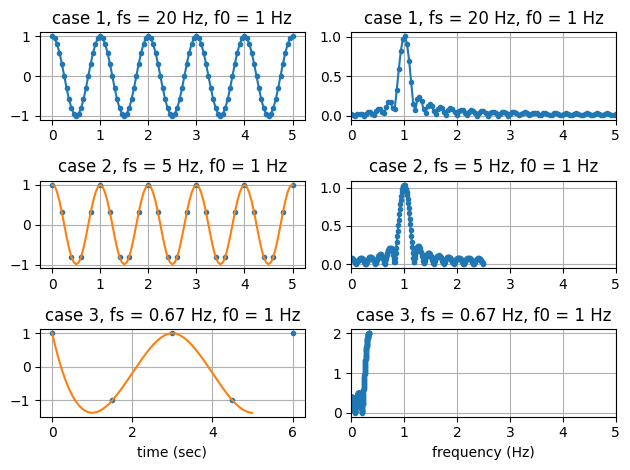

In [57]:
#import scipy
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d

# case 1
# time series
dt = 0.05        # time interval
fs1 = 1/dt       # sampling rate
f0 = 1          # here, the sampling rate is 20 Hz, larger than the dominant frequency of 1 Hz
t1 = np.arange(0, 5 + dt, dt)
x1 = np.cos(2 * np.pi * t1 * f0)
N = len(t1)
L = N / 2
# frequency parameters
fmax = fs1 / 2
Nfft = 512
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)
# Fourier transform
X = np.abs(np.fft.fft(x1, Nfft)) / L
Xx = X[:Nf + 1]

plt.subplot(3, 2, 1)
plt.plot(t1, x1, '.-')
plt.grid(True)
plt.title('case 1, fs = 20 Hz, f0 = 1 Hz')

plt.subplot(3, 2, 2)
plt.plot(f, Xx, '.-')
plt.grid(True)
plt.xlim([0, 5])
plt.title('case 1, fs = 20 Hz, f0 = 1 Hz')

# case 2
dt = 0.2
fs2 = 1/dt
t2 = np.arange(0, 5 + dt, dt)
x2 = np.cos(2 * np.pi * t2 * f0)
N = len(t2)
L = N / 2
# frequency parameters
fmax = fs2 / 2
Nfft = 512
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)
# Fourier transform
X = np.abs(np.fft.fft(x2, Nfft)) / L
Xx = X[:Nf + 1]

plt.subplot(3, 2, 3)
plt.plot(t2, x2, '.')
spline = UnivariateSpline(t2, x2)
y = spline(t1)
func1 = interp1d(t2, x2, kind='cubic')
y = func1(t1)
plt.plot(t1, y)
plt.grid(True)
plt.title('case 2, fs = 5 Hz, f0 = 1 Hz')

plt.subplot(3, 2, 4)
plt.plot(f, Xx, '.-')
plt.grid(True)
plt.xlim([0, 5])
plt.title('case 2, fs = 5 Hz, f0 = 1 Hz')


# signal parameters
dt = 1.5
fs3 = 1 / dt
t3 = np.arange(0, 5 + dt, dt)
f0 = 1
x3 = np.cos(2 * np.pi * t3 * f0)
N = len(t3)
L = N / 2

# frequency parameters
fmax = fs3 / 2
Nfft = 512
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)

# fourier transform
X = np.abs(np.fft.fft(x3, Nfft)) / L
Xx = X[:int(Nf) + 1]

# interpolation
t1 = np.arange(0, 5, 0.01)
interp_func = interp1d(t3, x3, kind='cubic')
y = interp_func(t1)

plt.subplot(3, 2, 5)
plt.plot(t3, x3, '.')
plt.plot(t1, y)
plt.grid(True)
plt.xlabel('time (sec)')
plt.title('case 3, fs = 0.67 Hz, f0 = 1 Hz')

plt.subplot(3, 2, 6)
plt.plot(f, Xx, '.-')
plt.xlim([0, 5])
plt.grid(True)
plt.xlabel('frequency (Hz)')
plt.title('case 3, fs = 0.67 Hz, f0 = 1 Hz')

plt.tight_layout()
plt.show()

##5. Insufficient sampling
Nyquist frequency is the maximum frequency that can be recovered with Fourier analysis

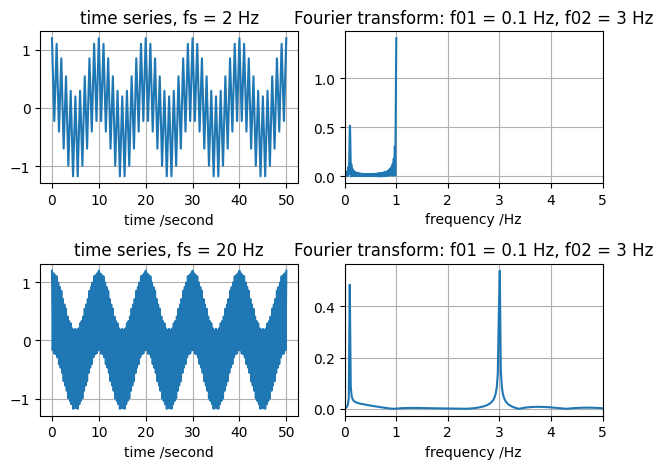

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# signal parameters;
dt = 0.5        # sample interval: 0.5s (how often you take a sample)
fs = 1 / dt     # sampling rate: 1/0.5 = 2 Hz
fmax = fs / 2   # this is the Nyquist frequency
t = np.arange(0, 50 + dt, dt)  # time from 0 to 50 s
f01 = 0.1       # dominate frequency of 0.1 Hz
f02 = 3         # dominate frequency of 3 Hz
# generate signals
N = len(t)
L = N / 2       # L is a scaling factor to get the true amplitude

# double frequency band.....
x = 0.5 * np.cos(2 * np.pi * t * f01) + 0.7 * np.cos(2 * np.pi * t * f02)

# now compute Fourier transform
Nfft = 1024
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)  # frequency spacing of 0.002 Hz
X = np.abs(np.fft.fft(x, Nfft)) / L    # this uses higher frequency spacing, Nfft = 1024
Xx = X[:Nf + 1]

plt.figure()
plt.subplot(2, 2, 1)
plt.plot(t, x)
plt.xlabel('time /second')
plt.grid(True)
plt.title('time series, fs = 2 Hz')

plt.subplot(2, 2, 2)
plt.plot(f, Xx)
plt.xlabel('frequency /Hz')
plt.grid(True)
plt.title('Fourier transform: f01 = 0.1 Hz, f02 = 3 Hz')
plt.xlim([0, 5])


# signal parameters;
dt = 0.05       # sample interval: 0.05s (how often you take a sample)
fs = 1 / dt     # sampling rate: 1/0.05 = 20 Hz
fmax = fs / 2   # this is the Nyquist frequency
t = np.arange(0, 50 + dt, dt)  # time from 0 to 50 s
f01 = 0.1       # dominate frequency of 0.1 Hz
f02 = 3         # dominate frequency of 3 Hz
# generate signals
N = len(t)
L = N / 2       # L is a scaling factor to get the true amplitude

# double frequency band.....
x = 0.5 * np.cos(2 * np.pi * t * f01) + 0.7 * np.cos(2 * np.pi * t * f02)

# now compute Fourier transform
Nfft = 1024
Nf = int(Nfft / 2)
f = fmax * np.linspace(0, 1, Nf + 1)  # frequency spacing of 0.002 Hz
X = np.abs(np.fft.fft(x, Nfft)) / L    # this uses higher frequency spacing, Nfft = 1024
Xx = X[:Nf + 1]

plt.subplot(2, 2, 3)
plt.plot(t, x)
plt.xlabel('time /second')
plt.grid(True)
plt.title('time series, fs = 20 Hz')

plt.subplot(2, 2, 4)
plt.plot(f, Xx)
plt.xlabel('frequency /Hz')
plt.grid(True)
plt.title('Fourier transform: f01 = 0.1 Hz, f02 = 3 Hz')
plt.xlim([0, 5])

# note the higher frequency 3Hz is recovered with higher sampling rate

plt.tight_layout()
plt.show()

##6. Cross-correlation

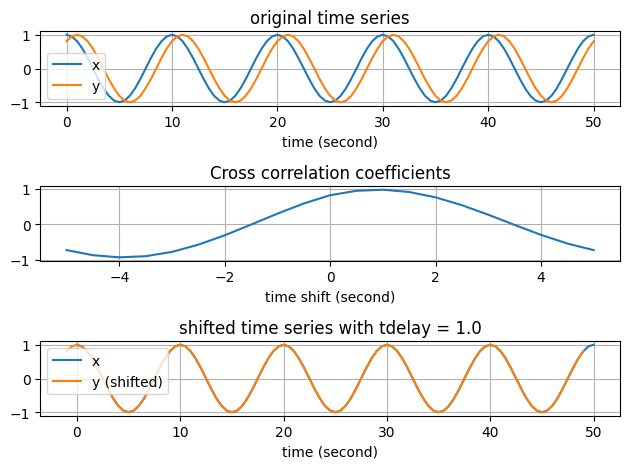

In [63]:

# signal parameters
dt = 0.5        # sample interval: 0.5s (how often you take a sample)
fs = 1 / dt     # sampling rate: 1/0.5 = 2 Hz
fmax = fs / 2   # this is the Nyquist frequency
t = np.arange(0, 50 + dt, dt)  # time from 0 to 50 s
f0 = 0.1        # dominant frequency of 0.1 Hz

# generate signals
N = len(t)
tdelay = 1
x = np.cos(2 * np.pi * t * f0) + 0.002 * np.random.randn(N)  # generate time series (x)
y = np.cos(2 * np.pi * (t - tdelay) * f0) + 0.002 * np.random.randn(N)  # time series (y) is shifted

# calculate correlation coefficient at each time lag
maxlag = 10
lags = np.arange(-maxlag, maxlag + 1)
CC = np.zeros(len(lags))
scale = np.linalg.norm(x) * np.linalg.norm(y)

for i in range(len(lags)):
    m = lags[i]
    for n in range(N):
        n1 = n
        n2 = n + m
        if 0 <= n1 < N and 0 <= n2 < N:
            CC[i] += x[n] * y[n + m]

CC /= scale

# Find time delay
nlag = lags[np.argmax(CC)]
tdelay = nlag * dt

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.xlabel('time (second)')
plt.title('original time series')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(lags * dt, CC)
plt.xlabel('time shift (second)')
plt.title('Cross correlation coefficients')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, x, label='x')
plt.plot(t - tdelay, y, label='y (shifted)')
plt.xlabel('time (second)')
plt.title(f'shifted time series with tdelay = {tdelay}')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Now change the original function or delay and replot it

In [ ]:

# signal parameters
dt = 0.5        # sample interval: 0.5s (how often you take a sample)
fs = 1 / dt     # sampling rate: 1/0.5 = 2 Hz
fmax = fs / 2   # this is the Nyquist frequency
t = np.arange(0, 50 + dt, dt)  # time from 0 to 50 s
f0 = 0.1        # dominant frequency of 0.1 Hz

# generate signals
N = len(t)
tdelay = 1
x = np.cos(2 * np.pi * t * f0) + 0.002 * np.random.randn(N)  # generate time series (x)
y = np.cos(2 * np.pi * (t - tdelay) * f0) + 0.002 * np.random.randn(N)  # time series (y) is shifted

# calculate correlation coefficient at each time lag
maxlag = 10
lags = np.arange(-maxlag, maxlag + 1)
CC = np.zeros(len(lags))
scale = np.linalg.norm(x) * np.linalg.norm(y)

for i in range(len(lags)):
    m = lags[i]
    for n in range(N):
        n1 = n
        n2 = n + m
        if 0 <= n1 < N and 0 <= n2 < N:
            CC[i] += x[n] * y[n + m]

CC /= scale

# Find time delay
nlag = lags[np.argmax(CC)]
tdelay = nlag * dt

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.xlabel('time (second)')
plt.title('original time series')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(lags * dt, CC)
plt.xlabel('time shift (second)')
plt.title('Cross correlation coefficients')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, x, label='x')
plt.plot(t - tdelay, y, label='y (shifted)')
plt.xlabel('time (second)')
plt.title(f'shifted time series with tdelay = {tdelay}')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

##7. Convolution

In [ ]:

# Time range
t = np.arange(-500, 501)

# Input signal and its range
X = np.zeros_like(t)
x1 = -150
x2 = 150

# Impulse response and its range
H = np.zeros_like(t)
h1 = -50
h2 = 50

# Convolution output
Y = np.zeros_like(t)
xh1 = x1 + h1
xh2 = x2 + h2

# Generate input signal
x = np.sin(np.pi * t / 10) / (np.pi * t / 10)
x[t == 0] = 1

# Generate impulse response
h = np.where(t == 0, 1, t / t)

# Fit the input signal within range
H[(t >= h1) & (t <= h2)] = h[(t >= h1) & (t <= h2)]

# Fit the impulse response within range
X[(t >= x1) & (t <= x2)] = x[(t >= x1) & (t <= x2)]

# Plot original signal and impulse response
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.plot(t, X, linewidth=3)
plt.title('Input signal')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(t, H, 'r', linewidth=3)
plt.title('Impulse response')
plt.grid(True)

for n in range(xh1, xh2 + 1,10):  # Convolution limits
    # Convolution steps
    f = np.flip(X)            # Step 1: Flip
    Xm = np.roll(f, n)        # Step 2: Shift
    m = Xm * H                # Step 3: Multiply
    Y[t == n] = np.sum(m)     # Step 4: Add/Integrate/Sum

    # Convolution operation live
    plt.subplot(3, 2, (3, 4))
    plt.plot(t, H, 'r', t, np.roll(np.flip(X), n), linewidth=3)
    plt.title('Convolution operation: Flip, Shift, Multiply, and Add')
    plt.grid(True)

    # Result of convolution live
    plt.subplot(3, 2, (5, 6))
    plt.plot(t, Y, 'm', linewidth=3)
    plt.title('Convolution output')
    plt.grid(True)

    plt.tight_layout()
    plt.pause(0.01)  # Pause for a while

plt.show()